In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df = pd.read_csv('Training Data.csv')

In [62]:
df['CURRENT_JOB_YRS'].describe()

,CURRENT_JOB_YRS
count,252000.000000
mean,6.333877
std,3.647053
min,0.000000
25%,3.000000
50%,6.000000
75%,9.000000
max,14.000000


In [35]:
df

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0
251996,251997,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0
251997,251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0
251998,251999,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0,10,0


In [28]:
df['Income'].describe()

,Income
count,2.520000e+05
mean,4.997117e+06
std,2.878311e+06
min,1.031000e+04
25%,2.503015e+06
50%,5.000694e+06
75%,7.477502e+06
max,9.999938e+06


In [29]:
df['Risk_Flag'].value_counts()

,count
Risk_Flag,
0,221004
1,30996


#1. Data Cleansing

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [34]:
df.describe()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


In [36]:
df.isnull().sum()

,0
Id,0
Income,0
Age,0
Experience,0
Married/Single,0
House_Ownership,0
Car_Ownership,0
Profession,0
CITY,0
STATE,0


In [32]:
df.duplicated().sum()

0

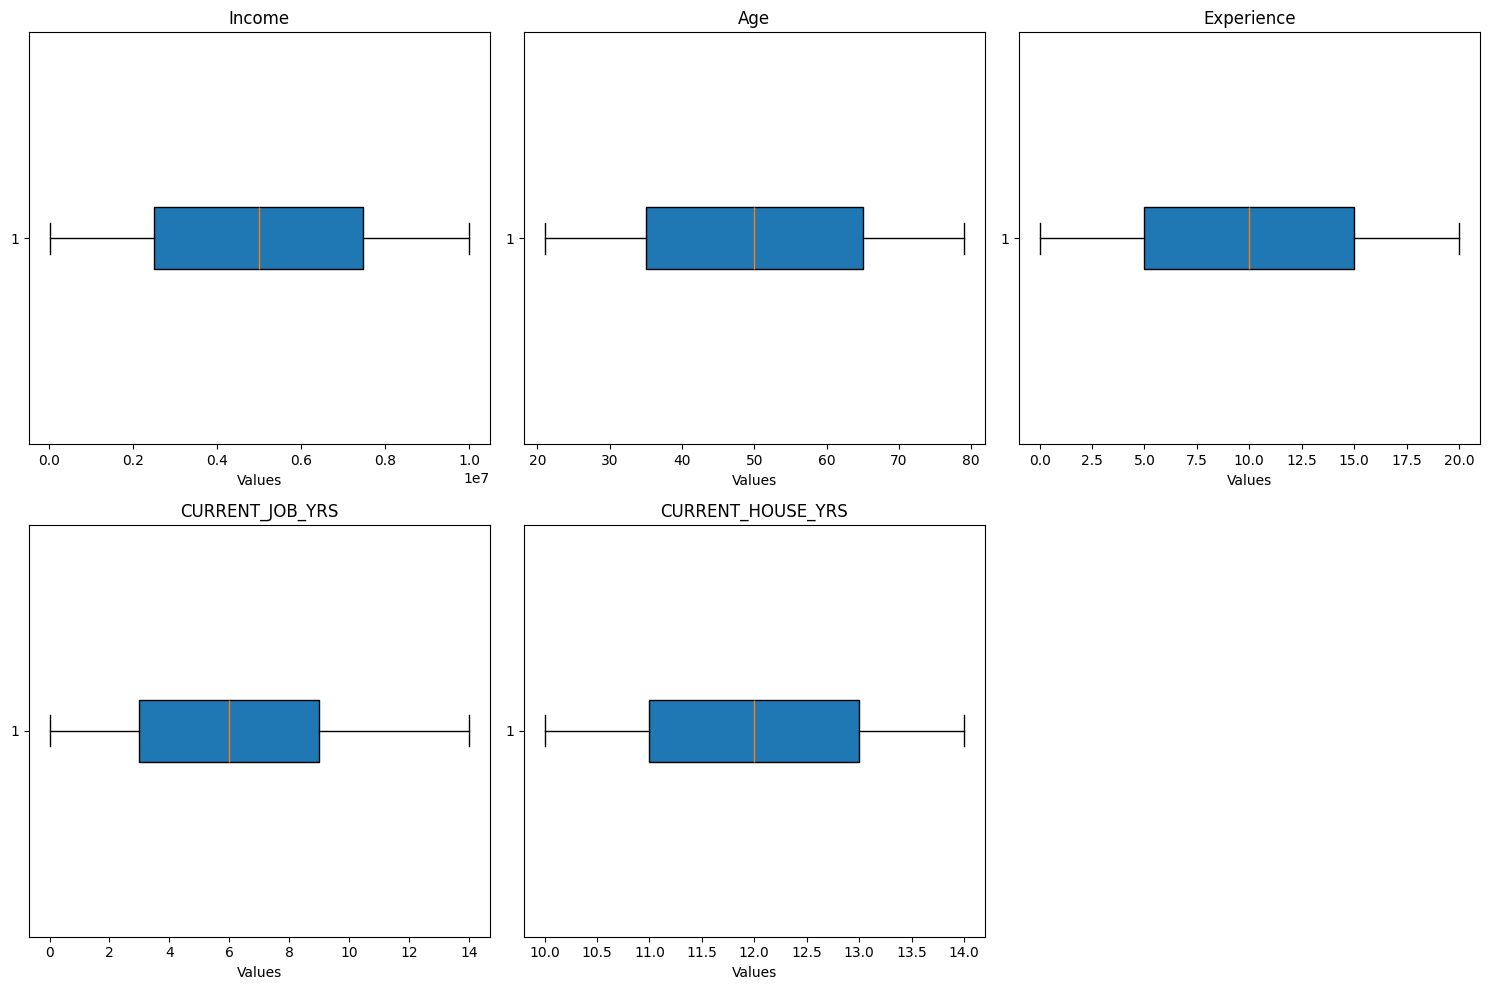

In [37]:
# List of numerical columns to analyze for outliers
numerical_columns = ['Income', 'Age', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS']

# Create boxplots for each numerical column to visualize outliers
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    plt.boxplot(df[column], vert=False, patch_artist=True)
    plt.title(column)
    plt.xlabel('Values')

plt.tight_layout()
plt.show()

In [38]:
# Define a function for outlier removal using the IQR method
def remove_outliers_iqr(df, columns):
    df_cleaned = df.copy()
    for column in columns:
        Q1 = df_cleaned[column].quantile(0.25)
        Q3 = df_cleaned[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Filter out rows with outliers
        df_cleaned = df_cleaned[(df_cleaned[column] >= lower_bound) & (df_cleaned[column] <= upper_bound)]
    return df_cleaned

# Apply the function to the dataset
cleaned_data = remove_outliers_iqr(df, numerical_columns)

# Display a summary of the dataset before and after outlier removal
summary = pd.DataFrame({
    'Feature': numerical_columns,
    'Original Count': [len(df)] * len(numerical_columns),
    'Filtered Count': [len(cleaned_data)] * len(numerical_columns),
    'Outliers Removed': [len(df) - len(cleaned_data)] * len(numerical_columns)
})


summary


,Feature,Original Count,Filtered Count,Outliers Removed
0,Income,252000,252000,0
1,Age,252000,252000,0
2,Experience,252000,252000,0
3,CURRENT_JOB_YRS,252000,252000,0
4,CURRENT_HOUSE_YRS,252000,252000,0


In [39]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

scaler = MinMaxScaler()
label_encoder = LabelEncoder()

In [41]:
income_column = 'Income'

# Transformasi kolom Income saja
cleaned_data['Income_Scaled'] = scaler.fit_transform(cleaned_data[[income_column]])

# Tampilkan hasil
print(cleaned_data[['Income', 'Income_Scaled']].head())

    Income  Income_Scaled
0  1303834       0.129487
1  7574516       0.757206
2  3991815       0.398564
3  6256451       0.625263
4  5768871       0.576454


In [43]:
cleaned_data

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,Income_Scaled
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0,0.129487
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0,0.757206
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0,0.398564
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1,0.625263
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1,0.576454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0,0.815303
251996,251997,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0,0.283620
251997,251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0,0.451682
251998,251999,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0,10,0,0.650356


In [44]:
# Kolom kategori yang akan di-encode
columns_to_encode = ['Married/Single', 'House_Ownership', 'Car_Ownership']

# Lakukan label encoding dan langsung gantikan nilai di dataset
for column in columns_to_encode:
    cleaned_data[column] = label_encoder.fit_transform(cleaned_data[column])

In [45]:
cleaned_data

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,Income_Scaled
0,1,1303834,23,3,1,2,0,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0,0.129487
1,2,7574516,40,10,1,2,0,Software_Developer,Parbhani,Maharashtra,9,13,0,0.757206
2,3,3991815,66,4,0,2,0,Technical_writer,Alappuzha,Kerala,4,10,0,0.398564
3,4,6256451,41,2,1,2,1,Software_Developer,Bhubaneswar,Odisha,2,12,1,0.625263
4,5,5768871,47,11,1,2,0,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1,0.576454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,251996,8154883,43,13,1,2,0,Surgeon,Kolkata,West_Bengal,6,11,0,0.815303
251996,251997,2843572,26,10,1,2,0,Army_officer,Rewa,Madhya_Pradesh,6,11,0,0.283620
251997,251998,4522448,46,7,1,2,0,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0,0.451682
251998,251999,6507128,45,0,1,2,0,Graphic_Designer,Pondicherry,Puducherry,0,10,0,0.650356


In [46]:
from sklearn.utils import resample

# Check class distribution
class_distribution = cleaned_data['Risk_Flag'].value_counts()

# Handle imbalance using oversampling for the minority class
majority_class = cleaned_data[cleaned_data['Risk_Flag'] == class_distribution.idxmax()]
minority_class = cleaned_data[cleaned_data['Risk_Flag'] == class_distribution.idxmin()]

# Oversample minority class
minority_oversampled = resample(
    minority_class,
    replace=True,
    n_samples=len(majority_class),  # Match majority class count
    random_state=42
)

# Combine the majority class with the oversampled minority class
balanced_data = pd.concat([majority_class, minority_oversampled])

# Shuffle the dataset to ensure randomness
balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Display the balanced dataset's class distribution to the user
balanced_class_distribution = balanced_data['Risk_Flag'].value_counts()

balanced_class_distribution


,count
Risk_Flag,
0,221004
1,221004


#2. Data Engineering

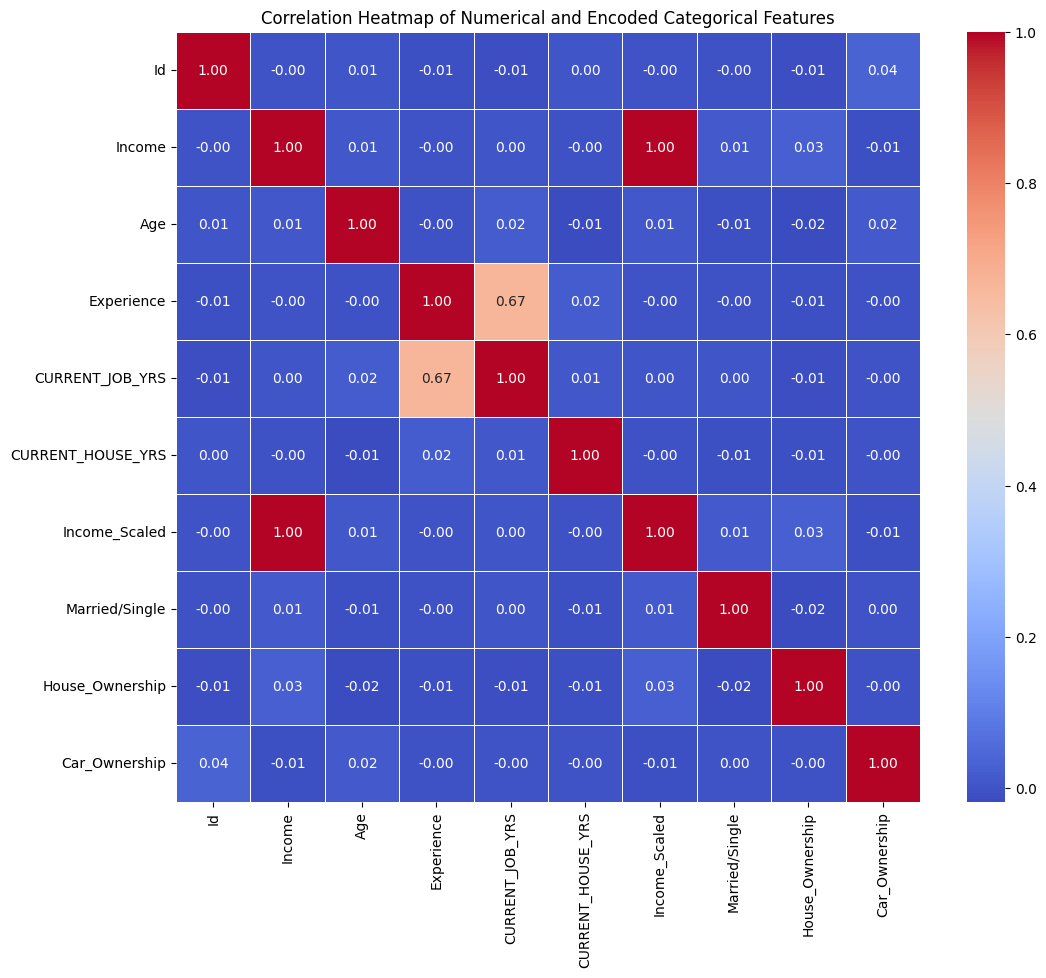

In [50]:
numerical_columns = [
    "Id", "Income", "Age", "Experience",
    "CURRENT_JOB_YRS", "CURRENT_HOUSE_YRS", "Income_Scaled"
] + columns_to_encode

numerical_data = balanced_data[numerical_columns]

# Hitung matriks korelasi
correlation_matrix = numerical_data.corr()

# Plot heatmap korelasi
plt.figure(figsize=(12, 10))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar=True,
    linewidths=0.5
)
plt.title("Correlation Heatmap of Numerical and Encoded Categorical Features")
plt.show()

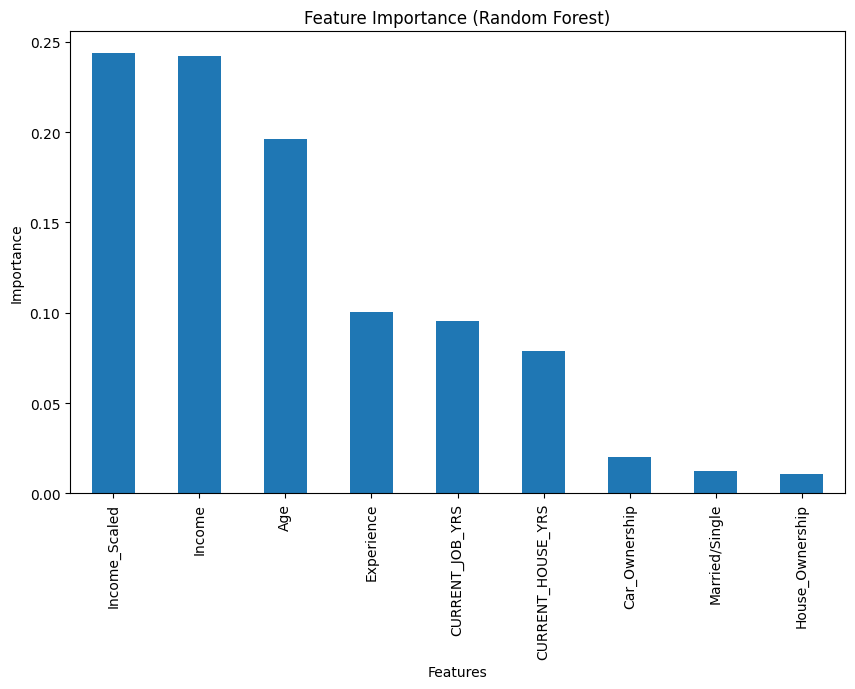

,0
Income_Scaled,0.243625
Income,0.242278
Age,0.196377
Experience,0.100594
CURRENT_JOB_YRS,0.095299
CURRENT_HOUSE_YRS,0.078878
Car_Ownership,0.020080
Married/Single,0.012302
House_Ownership,0.010566


In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Splitting data into features and target variable
X = balanced_data.drop(columns=["Risk_Flag","Profession","CITY","STATE","Id"])
y = balanced_data["Risk_Flag"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Train a Random Forest model to compute feature importance
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Extracting feature importances
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Visualizing feature importance
plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar')
plt.title("Feature Importance (Random Forest)")
plt.ylabel("Importance")
plt.xlabel("Features")
plt.show()

feature_importances

In [59]:
# 1. Income Category
Q1 = balanced_data['Income'].quantile(0.25)
Q3 = balanced_data['Income'].quantile(0.75)

def categorize_income(income):
    if income < Q1:
        return 'Low'
    elif Q1 <= income <= Q3:
        return 'Medium'
    else:
        return 'High'

balanced_data['Income_Category'] = balanced_data['Income'].apply(categorize_income)

In [60]:
# 2. Years to Retirement
retirement_age = 60

def calculate_years_to_retirement(age):
    years_to_retirement = retirement_age - age
    return max(0, years_to_retirement)

balanced_data['Years_to_Retirement'] = balanced_data['Age'].apply(calculate_years_to_retirement)

In [61]:
# 3. Ownership Stability Score (OSS)
def income_score(category):
    if category == 'High':
        return 3
    elif category == 'Medium':
        return 2
    elif category == 'Low':
        return 1
    return 0

balanced_data['OSS'] = (
    balanced_data['Income_Category'].apply(income_score) +
    balanced_data['House_Ownership'] +
    balanced_data['Car_Ownership']
)

In [63]:
# 4. Early Stability

balanced_data['Early_Stability'] = balanced_data['CURRENT_JOB_YRS'].apply(lambda x: 1 if x > 1 else 0)


In [65]:
balanced_data

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,Income_Scaled,Income_Category,Years_to_Retirement,OSS,Early_Stability
0,24938,2450562,21,5,1,2,1,Computer_hardware_engineer,Allahabad,Uttar_Pradesh[5],5,11,0,0.244279,Low,39,4,1
1,99003,2584624,31,14,1,2,0,Biomedical_Engineer,Kota[6],Rajasthan,8,12,0,0.257699,Medium,29,4,1
2,225462,4480738,75,6,1,2,0,Engineer,Malda,West_Bengal,4,14,1,0.447507,Medium,0,4,1
3,205325,8753042,74,12,0,2,0,Computer_operator,Bhiwandi,Maharashtra,9,12,0,0.875181,High,0,5,1
4,152855,5846474,49,9,0,2,1,Secretary,Nandyal,Andhra_Pradesh,6,14,0,0.584222,Medium,11,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442003,215378,3941355,71,14,0,2,0,Geologist,Noida,Uttar_Pradesh,12,10,1,0.393513,Medium,0,4,1
442004,4301,5712077,21,0,1,2,0,Police_officer,Mau,Uttar_Pradesh,0,12,1,0.570769,Medium,39,4,0
442005,149220,1886741,37,11,1,2,0,Dentist,Raipur,Chhattisgarh,11,14,0,0.187838,Low,23,3,1
442006,165056,9511802,55,10,1,2,1,Official,Korba,Chhattisgarh,4,14,0,0.951136,High,5,6,1


1. Income_Category:
    Kategori berdasarkan kuartil Income:

    - Low: di bawah kuartil pertama.
    - Medium: antara kuartil pertama dan ketiga.
    - High: di atas kuartil ketiga.
2. Years_to_Retirement:

    Menghitung sisa tahun sebelum pensiun dengan asumsi usia pensiun adalah 60 tahun.
3. Ownership Stability Score (OSS):

    Skor dihitung berdasarkan:
    - Kategori pendapatan (Income_Category): High (3), Medium (2), Low (1).
    - Kepemilikan rumah (House_Ownership): Tidak punya (0), Sewa (1), Punya - rumah (2).
    - Kepemilikan mobil (Car_Ownership): Tidak punya (0), Punya (1).
4. Early_Stability:

    Fitur biner yang menentukan apakah seseorang memiliki pekerjaan stabil:
    - 1 jika CURRENT_JOB_YRS > 1.
    - 0 jika sebaliknya.
